### 1 - Importar librerias y set configuracion

In [881]:
import pandas as pd
import numpy as np
import regex as re
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 100)

#### - Importar archivo csv

In [882]:
shark = pd.read_csv('attacks.csv', sep=',', encoding='latin-1')
#shark

### 2 - revisar tipos de datos de columnas

In [883]:
shark.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [884]:
#Revisando los nombres de columna
lst_col = shark.columns.tolist()
#shark1.columns.tolist()
lst_col_clean = []
s=''
for i in lst_col:
    s = re.sub(' $| \(Y/N\)', '', i)
    s = re.sub(' ', '_', s)
    s = s.lower()
    lst_col_clean.append(s)
#lst_col_clean
shark.columns = lst_col_clean
shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### 3 - Cantidad de valores null 

In [885]:
shark.isna().sum()

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal                     19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

### 4 - Limpieza de nulls

In [886]:
#Eliminar filas que no tenga minimo 12 valores No-Nulls
shark1 = shark.dropna(thresh=12)
#eliminar duplicados
shark1 = shark1.drop_duplicates()
#Eliminacion de columnas vacias
del shark1['unnamed:_22']
del shark1['unnamed:_23']
#verificar cantidad luego de limpieza
shark1.isna().sum()

case_number                  1
date                         0
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal                      539
time                      3354
species                   2838
investigator_or_source      17
pdf                          0
href_formula                 1
href                         0
case_number.1                0
case_number.2                0
original_order               0
dtype: int64

### 5 - llenar valores nulls

In [887]:
shark1.fillna({'year':0}, inplace=True)
shark1.fillna({'country':'unknown'}, inplace=True)
shark1.fillna({'area':'unknown'}, inplace=True)
shark1.fillna({'location':'unknown'}, inplace=True)
shark1.fillna({'activity':'unknown'}, inplace=True)
shark1.fillna({'time':'unknown'}, inplace=True)
shark1.fillna({'type':'unknown'}, inplace=True)
shark1.fillna({'age':'unknown'}, inplace=True)
shark1.fillna({'species':'unknown'}, inplace=True)

### 6  -  cambiar tipo de datos de columnas

In [888]:
shark1 = shark1.astype({"year": int})
shark1 = shark1.astype({"original_order": int})
#shark1['year'].value_counts()

### 7 - limpieza de columnas

In [889]:
#nueva copia del dataframe
shark2=shark1.copy()  #cambiado por aclaracion durante la presentacion

#### - columna activity

In [890]:
#extraer actividad 
shark2['activity_clean'] = shark1['activity'].str.extract(r'([aA-zZ]*ing)' )
shark2['activity_clean'] = shark2['activity_clean'].str.lower()
#cantidad de actividades
#shark2['activity_clean'].value_counts()

In [891]:
#shark1[shark1['country'].str.contains("VENEZUELA")]

#### - columna type

In [892]:
shark2['type_clean'] = shark2['type'].str.replace(r'ing|omg', '' )
shark2['type_clean'] = shark2['type_clean'].str.lower()
shark2['type_clean'].value_counts()
#shark1[shark1['type'].str.contains("Boatomg")]

unprovoked      4595
provoked         574
invalid          547
boat             341
sea disaster     239
unknown            4
questionable       2
Name: type_clean, dtype: int64

#### - columna sex

In [893]:
shark2['sex_clean'] = shark1['sex'].str.lower()
shark2['sex_clean'] = shark2['sex_clean'].str.replace(r'n|\.|lli|m ', 'unknown' )
shark2.fillna({'sex_clean':'unknown'}, inplace=True)
shark2['sex_clean'].value_counts()

m          5094
f           637
unknown     571
Name: sex_clean, dtype: int64

#### - columna species

In [894]:
#extraer la specie
shark2['species_clean'] = shark2['species'].str.extract(r'([aA-zZ]* shark)' )
shark2['species_clean'] = shark2['species_clean'].str.lower()
regex = r'^ shark|shark $|] shark|m shark|no shark|lb shark|kg shark|a shark|foot shark|small shark|of shark'
shark2['species_clean'] = shark2['species_clean'].str.replace(regex, 'shark' )
shark2['species_clean'] = shark2['species_clean'].str.replace(r'^shark|unknown', 'unconfirmed species shark' )
shark1.fillna({'species_clean':'unconfirmed species shark'}, inplace=True)
#cantidad de species
#shark2['species_clean'].value_counts()

#### - columna fatal

In [895]:
shark2['fatal_clean'] = shark2['fatal'].str.replace(r' ', '' )
shark2['fatal_clean'] = shark2['fatal_clean'].str.lower()
shark2['fatal_clean'] = shark2['fatal_clean'].str.replace(r'2017|m', 'unknown' )
shark2['fatal_clean'].value_counts()

n          4301
y          1389
unknown      73
Name: fatal_clean, dtype: int64

#### - columna country

In [896]:
#reemplazar regex
shark2['country_clean'] = shark2['country'].str.replace(r'^ | $', '' )
#convertir en minusculas
shark2['country_clean'] = shark2['country_clean'].str.lower()
#Primera letra en mayuscula por nombre de paises
shark2['country_clean'] = shark2['country_clean'].str.title()
#shark2['country_clean'].value_counts()

#### - columna time

In [897]:
shark2['time_clean'] = shark1['time'].str.lower()
regex = r'([0-9][0-9]h[0-9][0-9]|afternoon|morning|night|dusk|evening|unknown)'
shark2['time_clean'] = shark2['time_clean'].str.extract(regex, expand=True )
#shark2['time_clean'].value_counts()

In [898]:
#### - columna date

In [899]:
shark2['date_clean'] = shark1['date'].str.lower()
regex = r'reported |^ *| *$'
shark2['date_clean'] = shark2['date_clean'].str.replace(regex, '' )
shark2['date_clean'] = shark2['date_clean'].str.replace('jan', '01' )
shark2['date_clean'] = shark2['date_clean'].str.replace('feb', '02' )
shark2['date_clean'] = shark2['date_clean'].str.replace('mar', '03' )
shark2['date_clean'] = shark2['date_clean'].str.replace('apr', '04' )
shark2['date_clean'] = shark2['date_clean'].str.replace('may', '05' )
shark2['date_clean'] = shark2['date_clean'].str.replace('jun', '06' )
shark2['date_clean'] = shark2['date_clean'].str.replace('jul', '07' )
shark2['date_clean'] = shark2['date_clean'].str.replace('aug', '08' )
shark2['date_clean'] = shark2['date_clean'].str.replace('sep', '09' )
shark2['date_clean'] = shark2['date_clean'].str.replace('oct', '10' )
shark2['date_clean'] = shark2['date_clean'].str.replace('nov', '11' )
shark2['date_clean'] = shark2['date_clean'].str.replace('dec', '12' )
shark2['date_clean'] = shark2['date_clean'].str.replace('[a-z]*|,|\.| *|"', '' )
# llenar valores nulos o vacios
shark2['date_clean'] = shark2['date_clean'].str.replace('^$', 'unknown' )
shark1.fillna({'date_clean':'unknown'}, inplace=True)
shark2['date_clean'].value_counts()

1958          14
1960          14
1950          13
1957          13
1942          11
              ..
07-05-1996     1
21-10-2008     1
23-05-2001     1
03-07-1927     1
15-01-1954     1
Name: date_clean, Length: 5276, dtype: int64

### 8 - Comparacion de columnas

In [900]:
#comparar case_number
comp_col = np.where(shark2["case_number.1"] == shark2["case_number.2"], True, False)
#c = pd.DataFrame(comp_col)
#c[0].value_counts()
comp_col = np.where(shark2["case_number"] == shark2["case_number.1"], True, False)
c = pd.DataFrame(comp_col)
c[0].value_counts()

True     6278
False      24
Name: 0, dtype: int64

In [901]:
#comparar case_number
comp_col = np.where(shark2["href"] == shark2["href_formula"], True, False)
c = pd.DataFrame(comp_col)
c[0].value_counts()

True     6242
False      60
Name: 0, dtype: int64

In [902]:
#limpio la url de href para saber si contiene pdf
shark2['pdf2'] = shark2['href'].str.replace('http://sharkattackfile.net/spreadsheets/pdf_directory/', '' )
comp_col = np.where(shark2["pdf"] == shark2["pdf2"], True, False)
c = pd.DataFrame(comp_col)
c[0].value_counts()

True     6265
False      37
Name: 0, dtype: int64

#### - Eliminacion columnas iguales

In [903]:
del shark2['href_formula']
del shark2['case_number.1']
del shark2['case_number.2']
del shark2['pdf']
del shark2['pdf2']
#igual al indice
del shark2['original_order']

#### - Eliminacion columnas que ya fueron limpiadas

In [904]:
del shark2['time']
del shark2['fatal']
del shark2['species']
del shark2['type']
del shark2['activity']
del shark2['country']
del shark2['date']
del shark2['year']
del shark2['sex']

### 9 - Reestructuracion

In [905]:
#copia de dataframe para exportar
shark3 = shark2.copy()  #cambiado por aclaracion durante la presentacion

In [906]:
#Quitando la terminacion _clean
lst_col = shark3.columns.tolist()
lst_col_clean = []
s=''
for i in lst_col:
    s = re.sub('_clean$', '', i)
    lst_col_clean.append(s)
#lst_col_clean
shark3.columns = lst_col_clean

In [907]:
#moviendo posicion columnas
shark3.columns.tolist()
mov = ['date',
 'time',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'species',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'case_number',
 'investigator_or_source',
 'href']
shark3 = shark3[mov]
shark3.head()

,date,time,type,country,area,location,activity,species,name,sex,age,injury,fatal,case_number,investigator_or_source,href
0,25-06-2018,18h00,boat,Usa,California,"Oceanside, San Diego County",paddling,white shark,Julie Wolfe,f,57,"No injury to occupant, outrigger canoe and pad...",n,2018.06.25,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,18-06-2018,14h00,unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,NaN,Adyson McNeely,f,11,Minor injury to left thigh,n,2018.06.18,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
2,09-06-2018,07h45,invalid,Usa,Hawaii,"Habush, Oahu",surfing,NaN,John Denges,m,48,Injury to left lower leg from surfboard skeg,n,2018.06.09,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
3,08-06-2018,unknown,unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,unconfirmed species shark,male,m,unknown,Minor injury to lower leg,n,2018.06.08,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4,04-06-2018,unknown,provoked,Mexico,Colima,La Ticla,diving,tiger shark,Gustavo Ramos,m,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,2018.06.04,A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...


In [908]:
#Ultima comprobacion de valores null antes de exportar
#Se volvieron a cambiar los valores 'unknown' por null
shark3 = shark3.replace('unknown', np.NaN)
#shark4.isna().sum()
# Como ahora hay menos columnas se fijo que una fila tiene que tener al menos 14 valores No-Nulls para no ser eliminada
shark3 = shark3.dropna(thresh=14)

### 10 - Export CSV

In [909]:
# Exportar el dataframe como un archivo CSV
shark3.to_csv('shark.csv', sep=',', index=False)

### 11 - Graficas

In [910]:
#### Top 10 de paises con ataques de tiburon 

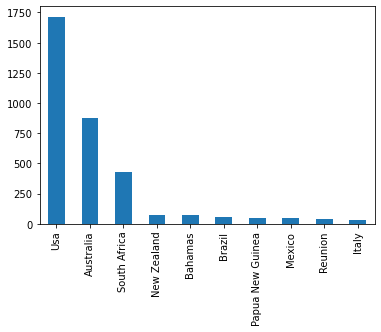

In [911]:
temp = shark3['country'].value_counts()
temp10 = temp.head(10)
temp10.plot(kind = 'bar')

In [912]:
#### Las 5 especies de tiburon que causan mas ataques

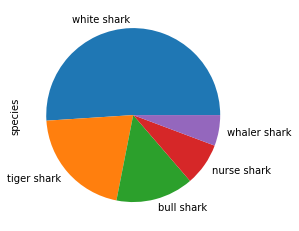

In [913]:
temp = shark3['species'].value_counts()
temp10 = temp.head(6)
temp5 = temp10.tail(5)
temp5.plot(kind = 'pie')

#### Cantidad de ataques de tiburon por sexo

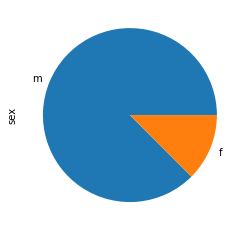

In [914]:
shark3['sex'].value_counts().plot(kind = 'pie')

#### Top de actividades durante los ataques

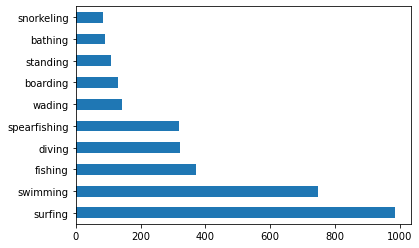

In [915]:
temp = shark3['activity'].value_counts()
temp10 = temp.head(10)
temp10.plot(kind = 'barh')

#### Cantidad de ataques con provocacion o sin provocacion

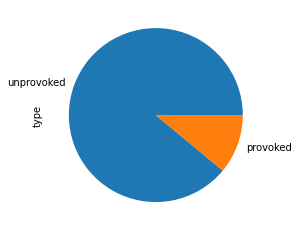

In [916]:
temp = shark3['type'].value_counts()
temp10 = temp.head(2)
temp10.plot(kind = 'pie')